**Motivação**
1. O ciclo de vida do cliente e a definição do problema - aprovação de Cartão de Crédito <br>
2. Lidando com os valores faltantes (missing values)  <br>
3. Convertendo valores categóricos em numéricos e análise exploratória (AED) <br>
4. Separando a base entre treinamento e teste <br>
5. Treinamento da Regressão Logística <br>
6. Avaliação do modelo <br>

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import os
os.chdir("C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados")

baseCC = pd.read_csv("cc_approvals.data", header = None)

baseCC.shape

(690, 16)

In [26]:
baseCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [27]:
baseCC.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [28]:
baseCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


# 2. Lidando com os valores faltantes (missing values)

In [29]:
# Verificando valores faltantes

print(baseCC.isnull().values.any())
print(baseCC.isna().values.any())

False
False


In [30]:
# Substituindo "?" e verificando se está tudo ok

baseCC = baseCC.replace("?", np.NaN)

print(baseCC.tail(20))

      0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670    b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671    b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672    a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  NaN  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674    a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675    a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676    a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677    b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678    a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679    a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680    b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681    b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682    b  17

In [31]:
print(baseCC.isnull().values.any())
print(baseCC.isna().values.any())

True
True


In [32]:
print(baseCC.isna().sum().sum())

67


In [33]:
baseCC = baseCC.fillna( method = 'ffill')

print(baseCC.count())
baseCC.tail(20)

0     690
1     690
2     690
3     690
4     690
5     690
6     690
7     690
8     690
9     690
10    690
11    690
12    690
13    690
14    690
15    690
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,a,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [34]:
baseCC = baseCC.drop([baseCC.columns[13]], axis = 1)

baseCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+


In [35]:
# Ajustando os nomes das colunas

baseCC.columns = ["var1", "var2", "var3", "var4", "var5", "var6", "var7"
                  , "var8", "var9", "var10", "var11", "var12", "var13", "var14", "alvo"]

baseCC.head(1)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,0,+


# 3. Convertendo valores categóricos em numéricos

In [36]:
# Usando o LabelEncoder
encoder = LabelEncoder()

# Percorrendo e transformando toda a base de dados
for variaveis in baseCC.columns:
    if baseCC[variaveis].dtype =='object':
        baseCC[variaveis] = encoder.fit_transform(baseCC[variaveis])
        
# Regressão logística necessita que as variáveis analisadas sejam numéricas, 
# esse método transforma essas variáveis em números        

In [37]:
baseCC.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


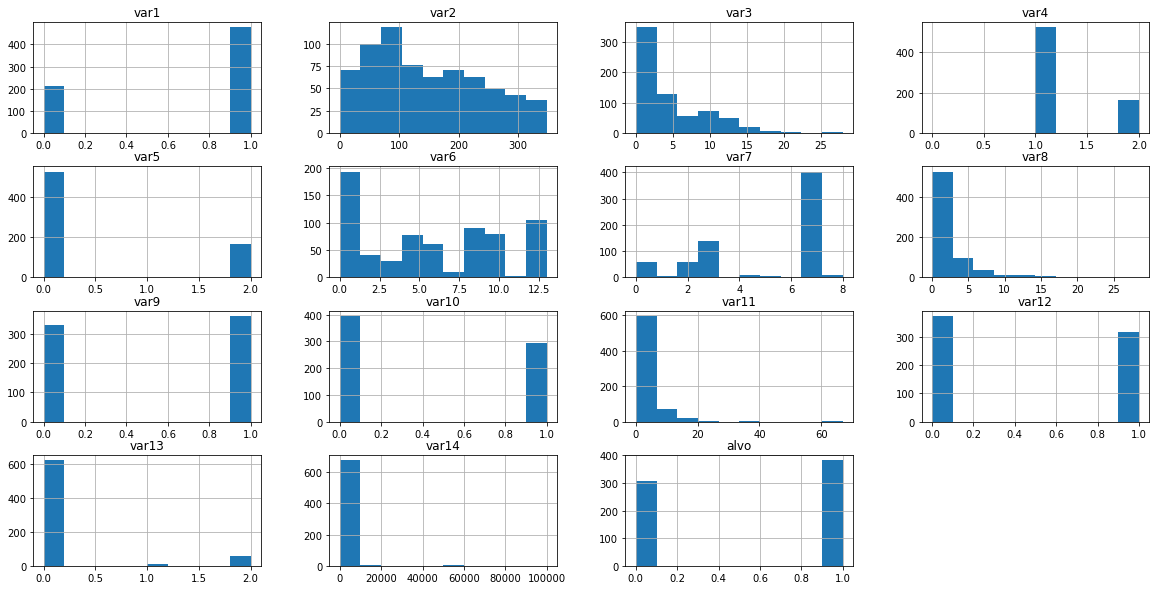

In [38]:
# Como todas as variáveis são numéricas, vamos plotar seus respectivos histogramas

baseCC.hist()
plt.gcf().set_size_inches(20,10)

**É importante saber interpretar os dados dos histogramas em alguns casos é possível perceber uma certa correlação ou tendência<br>
na var2 é possível perceber que ela segue uma linearidade até certo ponto e depois foge do esperado.<br><br>
Essa variável pode ser muito boa, no entanto essa distorção de ponta pode fazer com que o modelo <br>
dê menos importância do que deveria, nesse caso é interessante trabalhar essa variável dividindo ela em partes<br>**

In [39]:
# Cria intervalos da variável var2
var2X = list(range(baseCC.var2.min(), baseCC.var2.max()+50, 50)) # o +50 foi usado por ter havido um erro na criação
# cria uma lista do valor mín ao máx de var2, dividindo-0 de 50 em 50

# Cria o nome dos intervalos
nomeX = [f'var_i{i}' for i in range(len(var2X)-1)]
# Criei um laço for para automatizar a criação dos nomes das variáveis

# Atribui ao data frame
baseCC['var2X'] =  pd.cut(baseCC.var2, var2X, labels = nomeX, include_lowest = True)
# uso a função pd.cut para (que variável cortar, os intervalos, os labels, incluindo o menor valor)

In [40]:
baseCC.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2X
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var_i3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var_i6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var_i1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var_i2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var_i0


In [41]:
# Criar tabela cruzada para analise dos dados

# método pd.crosstab usando como referência(index) o "alvo" e se baseando na variável criada "var2X" 
crossCC = pd.crosstab(index = baseCC["alvo"], columns = baseCC["var2X"])
crossCC.index = ["Rejected", "Accepted"]

crossCC

var2X,var_i0,var_i1,var_i2,var_i3,var_i4,var_i5,var_i6
Rejected,44,65,45,39,42,40,32
Accepted,79,91,62,61,45,26,19


In [42]:
# lidando com NaN anteriores

baseCC = baseCC.fillna(method = 'ffill')
baseCC.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2X
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var_i3
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var_i6
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var_i1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var_i2
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var_i0


In [43]:
# removendo var2 para elminar redundância no modelo

baseCC = baseCC.drop("var2", axis = 1)
baseCC.head()

,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2X
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,var_i3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,var_i6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,var_i1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,var_i2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,var_i0


In [44]:
baseCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   var1    690 non-null    int32   
 1   var3    690 non-null    float64 
 2   var4    690 non-null    int32   
 3   var5    690 non-null    int32   
 4   var6    690 non-null    int32   
 5   var7    690 non-null    int32   
 6   var8    690 non-null    float64 
 7   var9    690 non-null    int32   
 8   var10   690 non-null    int32   
 9   var11   690 non-null    int64   
 10  var12   690 non-null    int32   
 11  var13   690 non-null    int32   
 12  var14   690 non-null    int64   
 13  alvo    690 non-null    int32   
 14  var2X   690 non-null    category
dtypes: category(1), float64(2), int32(10), int64(2)
memory usage: 49.7 KB


**A variável nova foi criada como do tipo categoria, como o modelo necessita que trabalhemos com variáveis numéricas temos que mudar isso**

In [45]:
# Convertendo dtype usando dicionário

categorias = {"var2X": {"var_i0": 0 ,"var_i1": 1, "var_i2": 2 ,"var_i3": 3 ,"var_i4": 4 ,"var_i5": 5,"var_i6": 6 }}

baseCC.replace(categorias,inplace = True)
baseCC.head()

,var1,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,alvo,var2X
0,1,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0,3
1,0,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0,6
2,0,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0,1
3,1,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0,2
4,1,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0,0


In [46]:
baseCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    690 non-null    int32  
 1   var3    690 non-null    float64
 2   var4    690 non-null    int32  
 3   var5    690 non-null    int32  
 4   var6    690 non-null    int32  
 5   var7    690 non-null    int32  
 6   var8    690 non-null    float64
 7   var9    690 non-null    int32  
 8   var10   690 non-null    int32  
 9   var11   690 non-null    int64  
 10  var12   690 non-null    int32  
 11  var13   690 non-null    int32  
 12  var14   690 non-null    int64  
 13  alvo    690 non-null    int32  
 14  var2X   690 non-null    int64  
dtypes: float64(2), int32(10), int64(3)
memory usage: 54.0 KB


In [47]:
#EXERCÍCIO: Fazer com var3 e var14 o mesmo que foi feito com var2
print(baseCC["var3"].describe())
print()
print(baseCC["var14"].describe())


count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: var3, dtype: float64

count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: var14, dtype: float64


# 4. Separando a base entre treinamento e teste


In [48]:
# Separandp os dados como variáveis  e alvo

x = baseCC.drop("alvo", axis = 1)
y = baseCC["alvo"]

#separando entre treino e teste

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.50, random_state=42)

# 5. Treinamento da Regressão Logística

In [50]:
# inicializa a instancia e treina o modelo

# Adicionando os intercepts
xTrainn = sm.add_constant(xTrain)
xTestt = sm.add_constant(xTest)

regLog = sm.GLM(yTrain, xTrainn, family = sm.families.Binomial())
regLog = regLog.fit()

print(regLog.summary())
print()
print('Parameters: ', regLog.params)
print()
print("Odds ratio")
print(np.exp(regLog.params))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   alvo   No. Observations:                  345
Model:                            GLM   Df Residuals:                      330
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.17
Date:                Thu, 26 Aug 2021   Deviance:                       212.35
Time:                        19:22:34   Pearson chi2:                     305.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4721   1.18e+04      0.002      0.9

In [ ]:
#EXERCÍRCIO: refazer o modelo removendo as variáveis var4 e var5

# 6. Avaliação do modelo

In [46]:
# Fazendo a previsão na base de treinamento e na base de teste

predTrain = regLog.predict(xTrainn)
predTest = regLog.predict(xTestt)

# Calculando a ROC e o Gini - Treinamento
fprTrain, tprTrain, thresholdsTrain = roc_curve(yTrain, predTrain)
roc_auc_train = auc(fprTrain, tprTrain)

print('AUC - Treinamento : %f' % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print()

# Calculando a ROC e o Gini - Treinamento
fprTest, tprTest, thresholdsTest = roc_curve(yTest, predTest)
roc_auc_test = auc(fprTest, tprTest)

print('AUC - Treinamento : %f' % roc_auc_test)
print("Gini - Treinamento: ", round(2*roc_auc_test-1,2))


AUC - Treinamento : 0.940155
Gini - Treinamento:  0.88

AUC - Treinamento : 0.904773
Gini - Treinamento:  0.81


In [59]:
# Muito importante
# Qual é o melhor ponto de corte para a aceitação do pedido de cartão de crédito
# O cruzamento entre true Positive Rate e False positive Rate - onde TPR é mais alta e FPR é mais baixa

i = np.arange(len(tprTrain))
rocTrain = pd.DataFrame ({ 'fpr'        : pd.Series(fprTrain, index = i)
                         , 'tpr'        : pd.Series(tprTrain, index = i)
                         , '1-fpr'      : pd.Series(1-fprTrain, index = i)
                         , 'tf'         : pd.Series(tprTrain - (1-fprTrain), index = i)
                         , 'thresholds' : pd.Series(thresholdsTrain, index = i)})

print(round(rocTrain.loc[(rocTrain.tf-0).abs().argsort()[:1]],3))
print()
print("ponto de corte otimo: 0.425")

      fpr    tpr  1-fpr     tf  thresholds
33  0.124  0.875  0.876 -0.001       0.425

ponto de corte otimo: 0.425


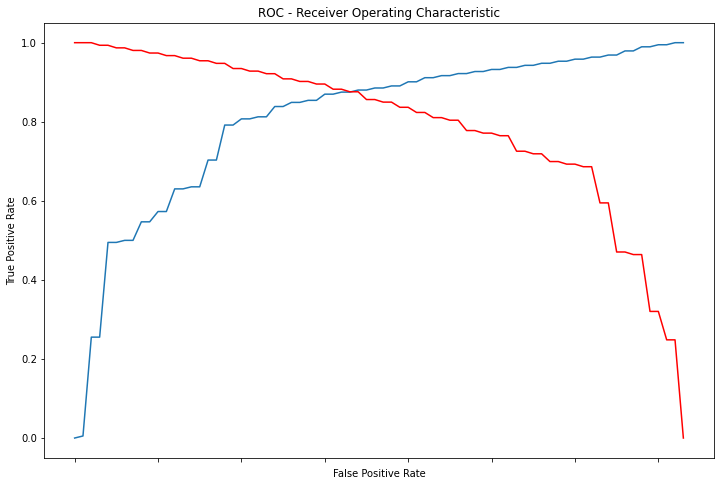

In [55]:
# Plotando a ROC(AUC) - Treinamento

fig, ax = plt.subplots()
plt.plot(rocTrain['tpr'])
plt.plot(rocTrain['1-fpr'], color = 'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic')
ax.set_xticklabels([]);
plt.gcf().set_size_inches(12,8)

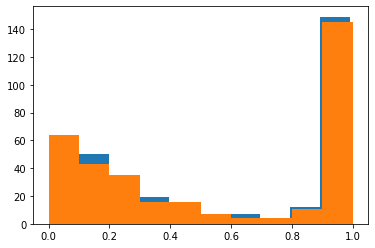

In [62]:
# Ajustando o ponto de corte

cutoff = 0.425

# Veja que os scores finais não são tão granulares (base pequena/poucas variáveis)
# e há concentração no 1

plt.hist(predTrain)
plt.hist(predTest);

# O efeito aqui será limitado pelo exemplo, mas em bases maiores o impacto é enorme

In [66]:
# Pre-processamento para a amtriz de confusão - Os dados devem ser binários

from sklearn.metrics import confusion_matrix

predTrainBin = predTrain
predTestBin = predTest

# Percorrendo e transformando todas as probabilidades do treinamento
for score in range (0, len(predTrain-1)):
    if predTrain.iloc[score] >= cutoff:
        predTrainBin.iloc[score] = 1
    else:
        predTrainBin.iloc[score] = 0
        
# Percorrendo e transformando todas as probabilidades do teste
for score in range (0, len(predTest-1)):
    if predTest.iloc[score] >= cutoff:
        predTestBin.iloc[score] = 1
    else:
        predTestBin.iloc[score] = 0

In [67]:
# Avaliando a base de treinamento
print("valiando a base de treinamento")
print(confusion_matrix(yTrain, predTrainBin))
print()
# Avaliando a base de teste
print("valiando a base de teste")
print(confusion_matrix(yTest, predTestBin))


valiando a base de treinamento
[[135  18]
 [ 24 168]]

valiando a base de teste
[[130  24]
 [ 29 162]]
